In [1]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names'] # X це параметри матриці , у це наші цілі

In [3]:
df_iris= pd.DataFrame(X, columns= feature_names)
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)} # присвоєння назв класів 0 1 2 
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
display(df_iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
from sklearn.model_selection import train_test_split

In [6]:
train_iris, test_iris = train_test_split(df_iris) # Розділення масиву на 2 масива

X_train = train_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] # дані з масиву
y_train1 = train_iris['label'] # цілі 
X_test = test_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']] # дані з масиву
y_test1 = test_iris['label'] # цілі 

print ('X_train.shape=', X_train.shape)
print ('y_train.shape=', y_train1.shape)
print ('X_test.shape=', X_test.shape)
print ('y_test.shape=', y_test1.shape)

print ('X_train[0]=')
X_train.iloc[0]
#НЕнормалізовані дані

X_train.shape= (112, 4)
y_train.shape= (112,)
X_test.shape= (38, 4)
y_test.shape= (38,)
X_train[0]=


sepal length (cm)    5.0
sepal width (cm)     2.0
petal length (cm)    3.5
petal width (cm)     1.0
Name: 60, dtype: float64

In [7]:
fruits_dict = dict(zip(df_iris['label'].unique(), df_iris['label_names'].unique())) # присвоєння кожному класу - цифру
print (fruits_dict)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [9]:
from ML_KNN_manual import Scaler
scaler = Scaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)
print ('X_train_scaled[0]=')
X_train_scaled1.iloc[0]
#нормалізовані дані

X_train_scaled[0]=


sepal length (cm)    0.171429
sepal width (cm)     0.000000
petal length (cm)    0.403509
petal width (cm)     0.375000
Name: 60, dtype: float64

In [10]:
from ML_KNN_manual import KNN_classifier
from sklearn.neighbors import KNeighborsClassifier 

In [11]:
result1 = 0.0
best_k1 = 0 

for knn in range(5,25):
    clf = KNeighborsClassifier(n_neighbors = knn)
    clf.fit(X_train_scaled1, y_train1)
    score = clf.score (X_test_scaled1, y_test1)
    if (result1 < score):
        result1=score 
        best_k1= knn

print(f'best_k: {best_k1 }, test_score: {result1}')
        


best_k: 9, test_score: 0.9473684210526315


<IPython.core.display.Javascript object>


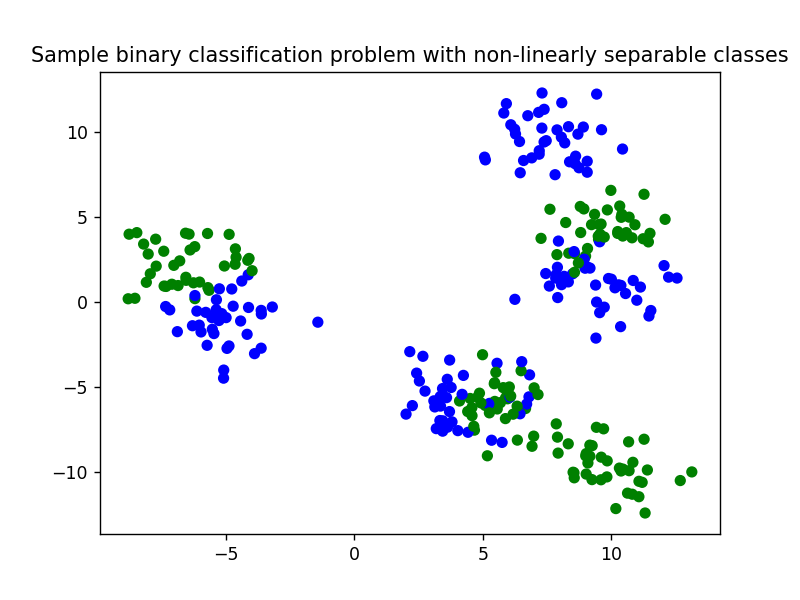

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

In [14]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
X_train_scaled, X_test_scaled = normalize(X_train, X_test)


In [15]:
from sklearn.neighbors import KNeighborsClassifier # sklearn 
import ML_mst as mst

%matplotlib notebook

In [16]:
result = 0.0
best_k = 0 

for knn in range(5,25):
    clf = KNeighborsClassifier(n_neighbors = knn)
    clf.fit(X_train_scaled, y_train)
    score = clf.score (X_test_scaled, y_test)
    if (result < score):
        result=score 
        k = knn

print(f'best_k: {k}, test_score: {result}')
        


best_k: 18, test_score: 0.9466666666666667


Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


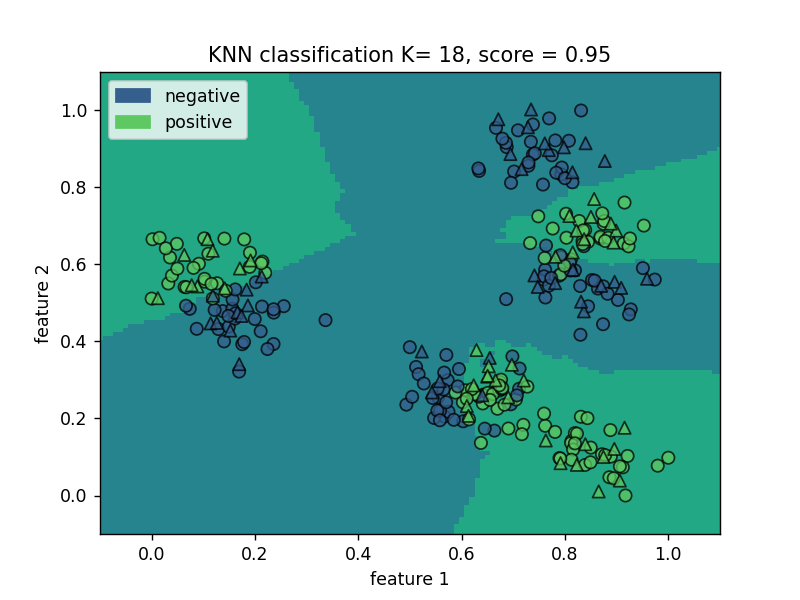

In [17]:
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test, title='KNN classification K= {}, score = {:.2f}'.format(k, score), precision=0.01,plot_symbol_size = 50)